In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

(information-entropy)=
# Information Entropy

Information entropy is a measure of the uncertainty of a probability distribution. It is defined as:

$$
\mathbb{H}[p(X)] = -\sum_x \log p(x) p(x).
$$

The sum is over all possible values of the random variable $X$.
If $X$ is continuous, the sum becomes an integral:

$$
\mathbb{H}[p(X)] = -\int_x \log p(x) p(x) dx.
$$

## Example - Information Entropy of a Binary Distribution

Let's take a random variable $X$ with two possible values, say $0$ and $1$.
Two numbers can describe the probability mass function:

$$
p_0 = p(X=0),
$$

and

$$
p_1 = p(X=1) = 1 - p_0.
$$

So, the information entropy of this distribution is simply a function of $p_0$:

$$
\mathbb{H}[p(X)] = -\sum_x \log p(x) p(x) = -p_0 \log p_0 - p_1 \log p_1 = -p_0 \log p_0 + (1-p_0)\log (1-p_0).
$$

Let's plot it as we vary $p_0$:

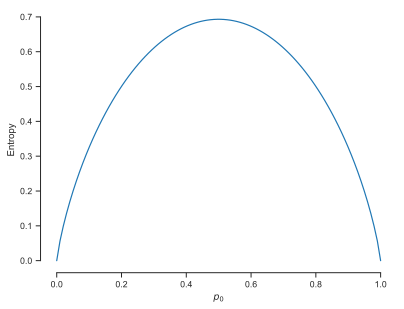

In [3]:
eps = 1e-8
p = np.linspace(eps, 1. - eps, 100)
H = -p * np.log(p) - (1. - p) * np.log(1. - p)

fig, ax = plt.subplots()
ax.plot(p, H)
ax.set_xlabel('$p_0$')
ax.set_ylabel('Entropy')
sns.despine(trim=True);

Notice that the function is maximized at $p_0 = 0.5$ because this corresponds to maximum uncertainty.
The function is minimized (as a matter of fact it is exactly zero) at $p_0 = 0$ and $p_0 = 1$ because both these cases correspond to minimum uncertainty (you are certain what is going to happen).

### Questions
+ You are given two Categorical distributions:

$$
X\sim \operatorname{Categorical}(0.1, 0.3, 0.5, 0.1),
$$

and

$$
Y\sim \operatorname{Categorical}(0.2, 0.2, 0.4, 0.2).
$$

Let's visualize them:

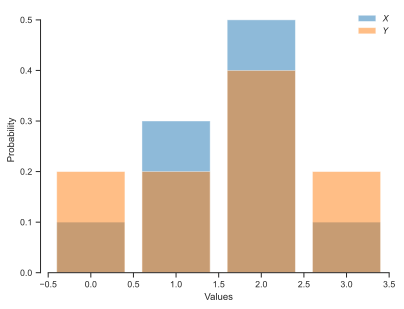

In [4]:
import scipy.stats as st

X = st.rv_discrete(
    values=(
        np.arange(4),
        [0.1, 0.3, 0.5, 0.1]
    )
)
Y = st.rv_discrete(
    values=(
        np.arange(4),
        [0.2, 0.2, 0.4, 0.2]
    )
)

fig, ax = plt.subplots()
ax.bar(
    range(4),
    X.pmf(np.arange(4)),
    alpha=0.5,
    label='$X$'
)
ax.bar(
    range(4),
    Y.pmf(np.arange(4)),
    alpha=0.5,
    label='$Y$'
)
plt.legend(loc='best', frameon=False)
ax.set_xlabel('Values')
ax.set_ylabel('Probability')
sns.despine(trim=True);

### Questions

+ Based on the picture above which of the two random variables, $X$ or $Y$, has the most uncertainty?
+ Use the block code below to calculate the entropy of each one of the distributions and answer the question above (which variable is more uncertaint) in a quantitative way.
We can use the functionality of ``scipy.stats`` to compute the entropy.

In [4]:
ent_X = X.entropy()
print(f'H[X] = {ent_X:.2f}')
# Write code that computes and prints the entropy of Y

H[X] = 1.17
